In [5]:
# Data management
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Graphics
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

# Preprocessing and modelling
# ------------------------------------------------------------------------------
from sklearn.neural_network import MLPRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn import set_config
import multiprocessing

from sklearn.metrics import accuracy_score
from sklearn import metrics 


# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
#warnings.filterwarnings('once')
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv('csv_finalCSVMulti.csv')
data.head()

,created_at,aid,extension,format,duration,FILE_STORED,FACIAL_ANALYSED,VOICE_ANALYSED,VOICE_TRANSCRIBED,BIOMETRICS_EXTRACTED,...,language,surprised_voice,no_speech_prob,entropy,tense_past,tense_present,tense_future,sentiment_polarity,sentiment_subjectivity,variable
0,1745237541,3f241254-97fe-4886-8297-3838d272ea84,.mp4,video,52,True,True,True,True,True,...,es,0.047122,0.031288,4.1018,0.0,1.0,0.0,-0.0617,0.7107,Ansiedad
1,1745237542,9e19679c-a1cb-4754-85ac-da0219e1398f,.mp4,video,60,True,True,True,True,True,...,es,0.039401,0.170642,4.4279,0.8,0.2,0.0,0.0830,0.4569,Ansiedad
2,1745237543,576c3f41-8d6a-402b-858a-54770ad42345,.mp4,video,51,True,True,True,True,True,...,es,0.022213,0.120449,4.0927,0.0,1.0,0.0,0.1143,0.6179,Ansiedad
3,1745237544,2bdea2f6-9cb8-4385-99e7-a4898b5b5391,.mp4,video,55,True,True,True,True,True,...,es,0.056491,0.040953,4.0626,0.0,1.0,0.0,0.0538,0.5182,Ansiedad
4,1745237545,c5d5a9fe-2dcb-4479-aec2-285d065cb55b,.mp4,video,45,True,True,True,True,True,...,es,0.028540,0.038975,4.0903,0.0,1.0,0.0,0.1500,0.6500,Ansiedad


In [7]:
# Copia del dataframe original
df = data.copy()

# Columnas a eliminar (sin eliminar 'language')
cols_to_drop = [
    'created_at', 'aid', 'extension', 'format', 'duration',
    'FILE_STORED', 'FACIAL_ANALYSED', 'VOICE_ANALYSED', 'VOICE_TRANSCRIBED',
    'BIOMETRICS_EXTRACTED', 'SPEECH_ANALYSED', 'PERSONALITY_ANALYSED',
    'FACES_EXTRACTED', 'id'
]

# Eliminar columnas
df.drop(columns=cols_to_drop, inplace=True)

# Comprobación
print(f"Número de columnas tras la limpieza: {df.shape[1]}")
df.head()

Número de columnas tras la limpieza: 68


,angry_facial,disgust_facial,fear_facial,happy_facial,sad_facial,surprise_facial,neutral_facial,most_frequent_dominant_emotion,dominant_emotion_counts_surprise,average_face_confidence,...,language,surprised_voice,no_speech_prob,entropy,tense_past,tense_present,tense_future,sentiment_polarity,sentiment_subjectivity,variable
0,0.0003,0.0001,0.1684,0.1863,0.3184,0.0000,0.3265,sad,NaN,0.9600,...,es,0.047122,0.031288,4.1018,0.0,1.0,0.0,-0.0617,0.7107,Ansiedad
1,0.0441,0.0001,0.0587,0.2474,0.1490,0.0262,0.4745,neutral,NaN,0.9150,...,es,0.039401,0.170642,4.4279,0.8,0.2,0.0,0.0830,0.4569,Ansiedad
2,0.0347,0.0000,0.1009,0.0003,0.4528,0.0000,0.4112,sad,NaN,0.9300,...,es,0.022213,0.120449,4.0927,0.0,1.0,0.0,0.1143,0.6179,Ansiedad
3,0.0066,0.0000,0.0686,0.0084,0.0150,0.0037,0.8976,neutral,NaN,0.9300,...,es,0.056491,0.040953,4.0626,0.0,1.0,0.0,0.0538,0.5182,Ansiedad
4,0.0118,0.0000,0.0192,0.0432,0.5066,0.0008,0.4183,neutral,NaN,0.9375,...,es,0.028540,0.038975,4.0903,0.0,1.0,0.0,0.1500,0.6500,Ansiedad


In [8]:

print(df['variable'].value_counts())

variable
Control      2433
Depresion    2260
Ansiedad     2233
Name: count, dtype: int64


In [9]:
# Ver número de valores nulos por columna (ordenado)
df.isnull().sum().sort_values(ascending=False).head(20)

dominant_emotion_counts_surprise    6242
angry_facial                         809
fear_facial                          809
happy_facial                         809
sad_facial                           809
surprise_facial                      809
neutral_facial                       809
most_frequent_dominant_emotion       809
average_face_confidence              809
disgust_facial                       809
sentiment_subjectivity                83
tense_past                            83
tense_present                         83
tense_future                          83
sentiment_polarity                    83
entropy                               83
openness                              81
agreeableness                         81
neuroticism                           81
extraversion                          81
dtype: int64

In [10]:
print ("Tamaño del dataset:", df.shape)

Tamaño del dataset: (6926, 68)


In [11]:
columnas_con_nulos = df.columns[df.isnull().any()].tolist()

# 3. Rellenar según el tipo de dato
for col in columnas_con_nulos:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])
        print(f"ℹ️ Columna categórica '{col}' rellenada con su moda")

# 4. Comprobar que ya no quedan nulos
total_nulos = df.isnull().sum().sum()
print(f"\n✅ Nulos restantes tras limpieza: {total_nulos}")

ℹ️ Columna categórica 'most_frequent_dominant_emotion' rellenada con su moda
ℹ️ Columna categórica 'language' rellenada con su moda

✅ Nulos restantes tras limpieza: 0


In [12]:
print ("Tamaño del dataset después (para comprobar que no se eliminan filas):", df.shape)

Tamaño del dataset después (para comprobar que no se eliminan filas): (6926, 68)


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# 1. Separar X e y
X = df.drop(columns=['variable'])  # variable objetivo
y = df['variable']

# 2. Identificar columnas categóricas para codificar
columnas_categoricas = X.select_dtypes(include=['object', 'category']).columns.tolist()
print("Columnas categóricas a codificar:", columnas_categoricas)

# 3. Aplicar OneHotEncoding
X = pd.get_dummies(X, columns=columnas_categoricas, drop_first=True)

# 4. Dividir en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5. Comprobación final
print("Tamaño X_train:", X_train.shape)
print("Tamaño X_test:", X_test.shape)
print("Distribución de clases en y_train:\n", y_train.value_counts())

Columnas categóricas a codificar: ['most_frequent_dominant_emotion', 'voice_mean_note', 'voice_median_note', 'voice_mode_note', 'voice_Q25_note', 'voice_Q75_note', 'language']
Tamaño X_train: (5540, 138)
Tamaño X_test: (1386, 138)
Distribución de clases en y_train:
 variable
Control      1946
Depresion    1808
Ansiedad     1786
Name: count, dtype: int64


In [14]:
# Librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

# Pipeline con escalado + red neuronal
mlp_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42))
])

# Entrenamiento
mlp_pipeline.fit(X_train, y_train)

# Predicción
y_pred = mlp_pipeline.predict(X_test)

# Resultados
print(confusion_matrix(y_test, y_pred))
print("\n === Report === \n")
print(classification_report(y_test, y_pred))


[[395  15  37]
 [ 30 422  35]
 [ 38  10 404]]

 === Report === 

              precision    recall  f1-score   support

    Ansiedad       0.85      0.88      0.87       447
     Control       0.94      0.87      0.90       487
   Depresion       0.85      0.89      0.87       452

    accuracy                           0.88      1386
   macro avg       0.88      0.88      0.88      1386
weighted avg       0.88      0.88      0.88      1386



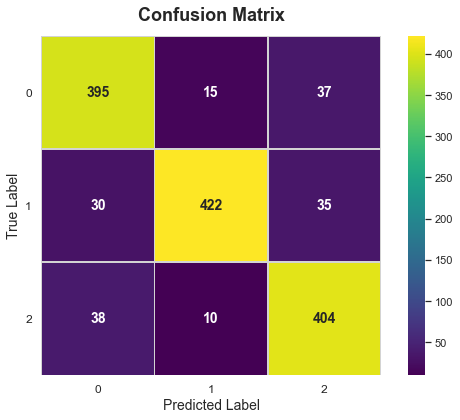

In [16]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular matriz de confusión
conf = confusion_matrix(y_test, y_pred)

# Estilo de seaborn
sns.set(style="whitegrid")

# Crear figura con tamaño amplio
plt.figure(figsize=(8,6))

# Dibujar el heatmap
sns.heatmap(
    conf,
    annot=True,
    fmt='d',
    cmap='viridis',
    square=True,
    linewidths=0.6,
    linecolor='lightgray',
    cbar=True,
    annot_kws={"fontsize": 14, "weight": "bold"},
)

# Títulos y etiquetas estilizadas
plt.title("Confusion Matrix", fontsize=18, fontweight='semibold', pad=15)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)

# Ajuste final del layout
plt.tight_layout()
plt.show()



Fitting 3 folds for each of 16 candidates, totalling 48 fits
Mejores parámetros: {'hidden_layer_sizes': (100,), 'learning_rate_init': 0.0001, 'max_iter': 300, 'solver': 'adam'}
Modelos entrenados para comparación gráfica.


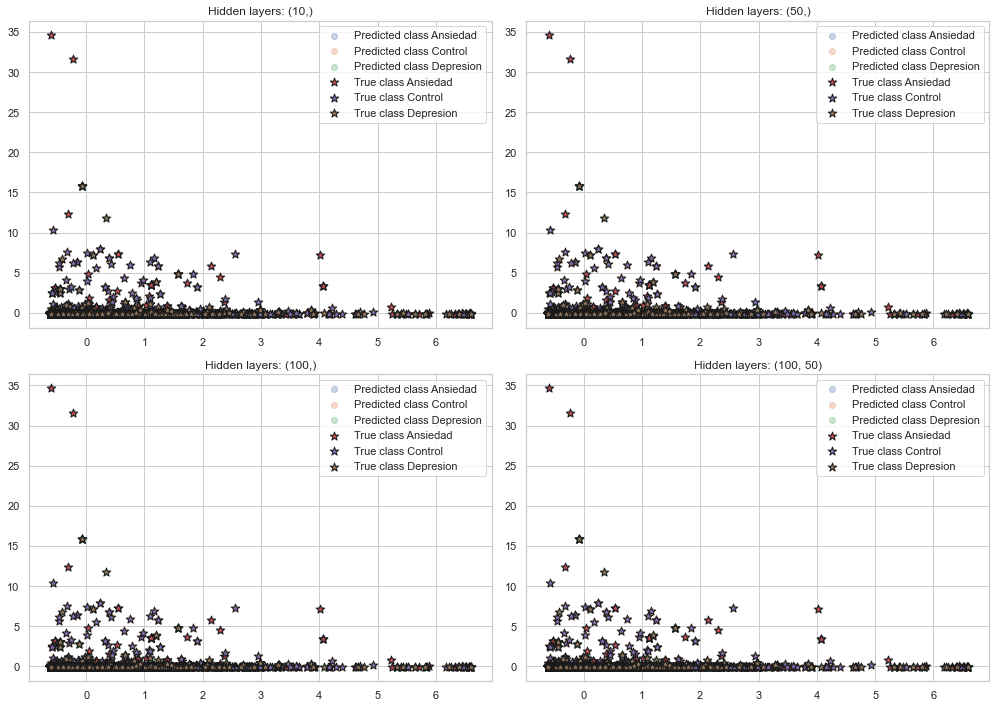

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(10,), (50,), (100,), (100, 50)],
    'learning_rate_init': [0.0001, 0.001, 0.01, 0.1],
    'max_iter': [300],
    'solver': ['adam']
}

grid = GridSearchCV(
    estimator=MLPClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=2,
    return_train_score=True
)

grid.fit(X_train_scaled, y_train)

print("Mejores parámetros:", grid.best_params_)

# Entrenar 4 modelos representativos para comparación gráfica
hidden_layers_to_compare = [(10,), (50,), (100,), (100, 50)]
models = []

for hl in hidden_layers_to_compare:
    model = MLPClassifier(
        hidden_layer_sizes=hl,
        learning_rate_init=grid.best_params_['learning_rate_init'],
        max_iter=300,
        solver='adam',
        random_state=42
    )
    model.fit(X_train_scaled, y_train)
    models.append(model)

print("Modelos entrenados para comparación gráfica.")

# Escalar features numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

# Para graficar, tomamos dos features numéricas, ajusta si quieres otras
X_grid = X_train_scaled[:, [0, 1]]

for i, model in enumerate(models):
    preds = model.predict(X_train_scaled)

    for class_label in np.unique(preds):
        axs[i].scatter(
            X_grid[preds == class_label, 0],
            X_grid[preds == class_label, 1],
            alpha=0.3,
            label=f"Predicted class {class_label}"
        )

    for class_label in np.unique(y_train):
        axs[i].scatter(
            X_grid[y_train == class_label, 0],
            X_grid[y_train == class_label, 1],
            marker='*',
            edgecolor='k',
            s=80,
            label=f"True class {class_label}"
        )
    axs[i].set_title(f"Hidden layers: {model.hidden_layer_sizes}")
    axs[i].legend()

plt.tight_layout()
plt.show()


NameError: name 'results_df' is not defined

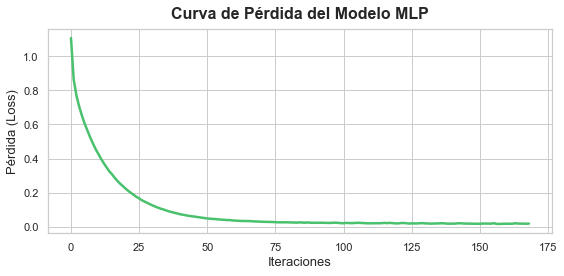

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo general
sns.set(style="whitegrid")

# Crear figura
plt.figure(figsize=(8, 4))

# Trazar la curva de pérdida
plt.plot(mlp_pipeline.named_steps['mlp'].loss_curve_,
         color=sns.color_palette("viridis")[4],
         linewidth=2.5)

# Estilizar el gráfico
plt.title("Curva de Pérdida del Modelo MLP", fontsize=16, fontweight='semibold', pad=10)
plt.xlabel("Iteraciones", fontsize=13)
plt.ylabel("Pérdida (Loss)", fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.tight_layout()
plt.show()


----

In [26]:
# Imports necesarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Dividir en train/test (si ya lo tienes puedes omitir esta línea)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Crear pipeline
mlp_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42))
])

# Entrenar el modelo
mlp_pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('mlp', MLPClassifier(max_iter=500, random_state=42))])

              precision    recall  f1-score   support

    Ansiedad       0.85      0.88      0.87       447
     Control       0.94      0.87      0.90       487
   Depresion       0.85      0.89      0.87       452

    accuracy                           0.88      1386
   macro avg       0.88      0.88      0.88      1386
weighted avg       0.88      0.88      0.88      1386



<module 'matplotlib.pyplot' from 'C:\\Users\\cscpd\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

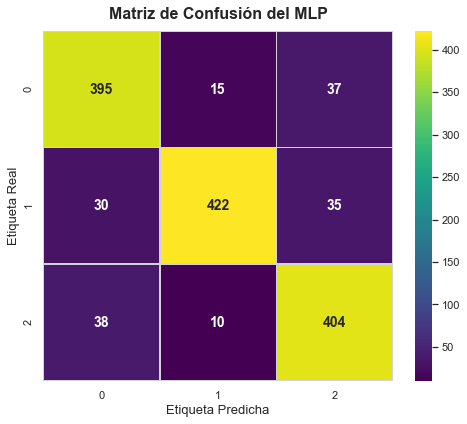

In [27]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predicción
y_pred = mlp_pipeline.predict(X_test)

# Reporte de clasificación
print(classification_report(y_test, y_pred))

# Matriz de confusión calculada
conf = confusion_matrix(y_test, y_pred)

# Estilo visual
sns.set(style="whitegrid")

# Figura
plt.figure(figsize=(7, 6))
sns.heatmap(conf, annot=True, fmt='d', cmap='viridis',
            linewidths=0.6, linecolor='lightgray',
            cbar=True, square=True,
            annot_kws={"fontsize": 14, "weight": "bold"})

# Estética textual
plt.title("Matriz de Confusión del MLP", fontsize=16, fontweight='semibold', pad=12)
plt.xlabel("Etiqueta Predicha", fontsize=13)
plt.ylabel("Etiqueta Real", fontsize=13)
plt



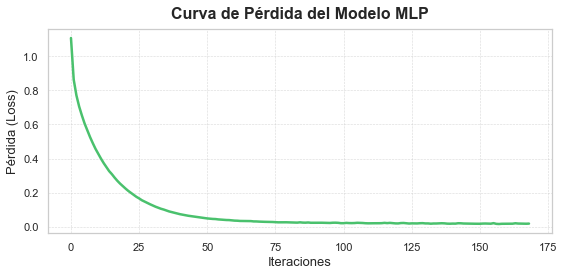

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer estilo general
sns.set(style="whitegrid")

# Crear la figura
plt.figure(figsize=(8, 4))

# Trazar la curva de pérdida del modelo MLP
plt.plot(mlp_pipeline.named_steps["mlp"].loss_curve_,
         color=sns.color_palette("viridis")[4],
         linewidth=2.5)

# Estética del gráfico
plt.title("Curva de Pérdida del Modelo MLP", fontsize=16, fontweight='semibold', pad=10)
plt.xlabel("Iteraciones", fontsize=13)
plt.ylabel("Pérdida (Loss)", fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, linestyle='--', linewidth=0.6, alpha=0.7)

plt.tight_layout()
plt.show()


---

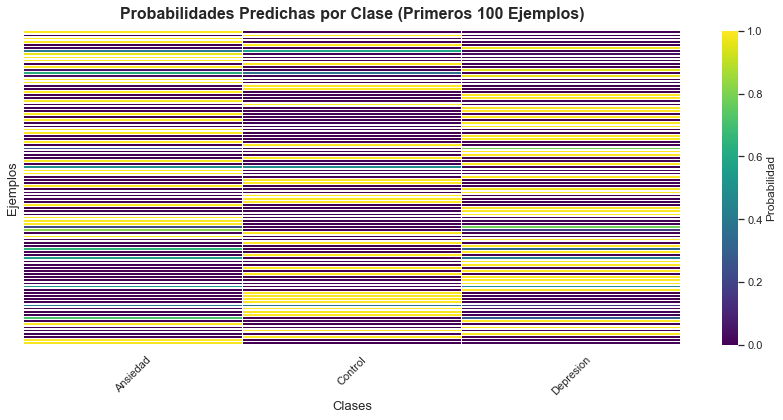

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener nombres de clases
class_names = mlp_pipeline.named_steps['mlp'].classes_

# Probabilidades predichas para cada clase
probas = mlp_pipeline.predict_proba(X_test)

# Aplicar estilo
sns.set(style="whitegrid")

# Crear figura
plt.figure(figsize=(12, 6))

# Heatmap estilizado de probabilidades
sns.heatmap(
    probas[:100],
    cmap='viridis',
    xticklabels=class_names,
    yticklabels=False,
    linewidths=0.4,
    linecolor='white',
    cbar=True,
    cbar_kws={'label': 'Probabilidad'}
)

# Estética textual
plt.title("Probabilidades Predichas por Clase (Primeros 100 Ejemplos)", fontsize=16, fontweight='semibold', pad=12)
plt.xlabel("Clases", fontsize=13)
plt.ylabel("Ejemplos", fontsize=13)
plt.xticks(fontsize=11, rotation=45)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()



Demás gráficos, de accuracy vs y tal


In [33]:
from sklearn.model_selection import GridSearchCV

# Definir pipeline base
mlp_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(max_iter=500, random_state=42))
])

# Definir parámetros: variación de número de neuronas
param_grid = {
    'mlp__hidden_layer_sizes': [(10,), (50,), (100,), (150,), (200,)]
}

# GridSearch con validación cruzada
grid_search = GridSearchCV(mlp_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, return_train_score=True)
grid_search.fit(X_train, y_train)

# Guardar resultados
import pandas as pd
results_df = pd.DataFrame(grid_search.cv_results_)

# Extraer número de neuronas (primera capa)
results_df['neurons'] = results_df['param_mlp__hidden_layer_sizes'].apply(lambda x: x[0])

# Agrupar por número de neuronas
results_grouped = results_df.groupby('neurons').agg({
    'mean_train_score': 'mean',
    'mean_test_score': 'mean'
})


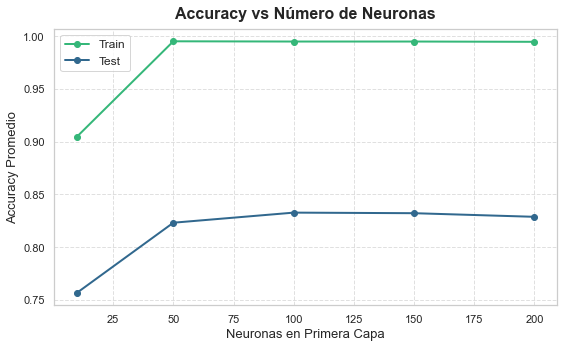

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo visual
sns.set(style="whitegrid")

# Crear gráfico
fig, ax = plt.subplots(figsize=(8, 5))
colors = sns.color_palette("viridis", n_colors=2)

ax.plot(results_grouped.index.values, results_grouped['mean_train_score'].values,
        marker='o', label='Train', color=colors[1], linewidth=2)
ax.plot(results_grouped.index.values, results_grouped['mean_test_score'].values,
        marker='o', label='Test', color=colors[0], linewidth=2)

# Estética
ax.set_title('Accuracy vs Número de Neuronas', fontsize=16, fontweight='semibold', pad=10)
ax.set_xlabel('Neuronas en Primera Capa', fontsize=13)
ax.set_ylabel('Accuracy Promedio', fontsize=13)
ax.legend(fontsize=12)
ax.tick_params(axis='both', labelsize=11)
ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Definir pipeline
mlp_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42))
])

# Rango de tasas de aprendizaje
param_grid_lr = {
    'mlp__learning_rate_init': [0.0001, 0.001, 0.01, 0.05, 0.1]
}

# Grid search sobre learning rate
grid_search_lr = GridSearchCV(mlp_pipeline, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1, return_train_score=True)
grid_search_lr.fit(X_train, y_train)

# Convertir resultados en DataFrame
results_lr_df = pd.DataFrame(grid_search_lr.cv_results_)

# Agregar columna para facilitar el gráfico
results_lr_df['learning_rate'] = results_lr_df['param_mlp__learning_rate_init']


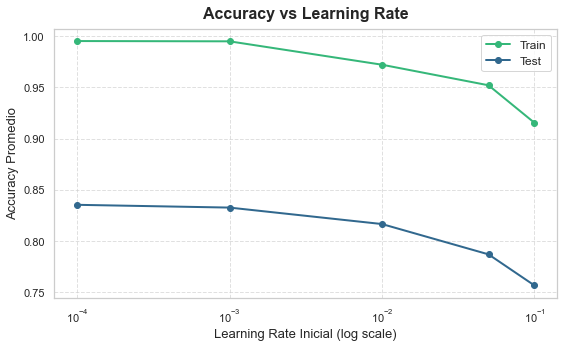

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Estilo visual coherente
sns.set(style="whitegrid")

# Crear figura
fig, ax = plt.subplots(figsize=(8, 5))
colors = sns.color_palette("viridis", n_colors=2)

# Asegurarse de que los arrays sean 1D y numéricos
x_vals = np.array(results_lr_df['learning_rate'], dtype=float)
train_acc = np.array(results_lr_df['mean_train_score'], dtype=float)
test_acc = np.array(results_lr_df['mean_test_score'], dtype=float)

# Trazar líneas
ax.plot(x_vals, train_acc, marker='o', label='Train', color=colors[1], linewidth=2)
ax.plot(x_vals, test_acc, marker='o', label='Test', color=colors[0], linewidth=2)

# Escala logarítmica en eje X
ax.set_xscale('log')

# Estética textual
ax.set_title('Accuracy vs Learning Rate', fontsize=16, fontweight='semibold', pad=10)
ax.set_xlabel('Learning Rate Inicial (log scale)', fontsize=13)
ax.set_ylabel('Accuracy Promedio', fontsize=13)
ax.legend(fontsize=12)
ax.tick_params(axis='both', labelsize=11)
ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Pipeline base
mlp_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(max_iter=500, random_state=42))
])

# Diferentes estructuras de capas ocultas
param_grid_layers = {
    'mlp__hidden_layer_sizes': [
        (50,), (100,), (150,),
        (100, 50), (150, 100),
        (100, 100), (150, 150)
    ]
}

# Búsqueda en rejilla con validación cruzada
grid_search_layers = GridSearchCV(
    mlp_pipeline,
    param_grid_layers,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    return_train_score=True
)

grid_search_layers.fit(X_train, y_train)

# Extraer resultados
results_layers_df = pd.DataFrame(grid_search_layers.cv_results_)

# Para representación más clara en gráfico
results_layers_df['structure'] = results_layers_df['param_mlp__hidden_layer_sizes'].astype(str)


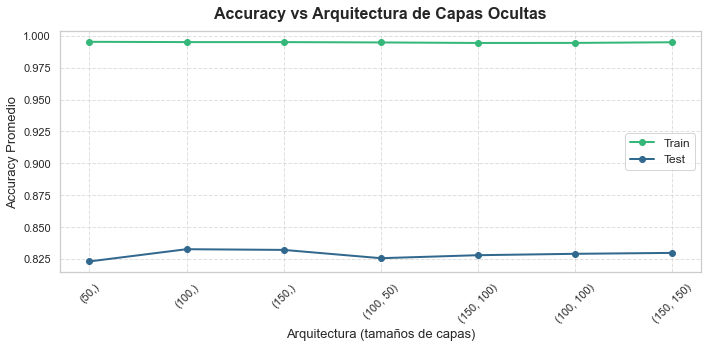

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Estilo visual
sns.set(style="whitegrid")

# Convertir estructuras a lista de strings
structures = results_layers_df['structure'].astype(str).tolist()
train_scores = np.array(results_layers_df['mean_train_score'], dtype=float)
test_scores = np.array(results_layers_df['mean_test_score'], dtype=float)

# Crear figura
plt.figure(figsize=(10, 5))
colors = sns.color_palette("viridis", n_colors=2)

# Graficar
plt.plot(structures, train_scores, marker='o', label='Train', color=colors[1], linewidth=2)
plt.plot(structures, test_scores, marker='o', label='Test', color=colors[0], linewidth=2)

# Estética
plt.title("Accuracy vs Arquitectura de Capas Ocultas", fontsize=16, fontweight='semibold', pad=12)
plt.xlabel("Arquitectura (tamaños de capas)", fontsize=13)
plt.ylabel("Accuracy Promedio", fontsize=13)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()
